In [54]:
from google.colab import drive
drive.mount('/content/MeuDrive')

Mounted at /content/MeuDrive


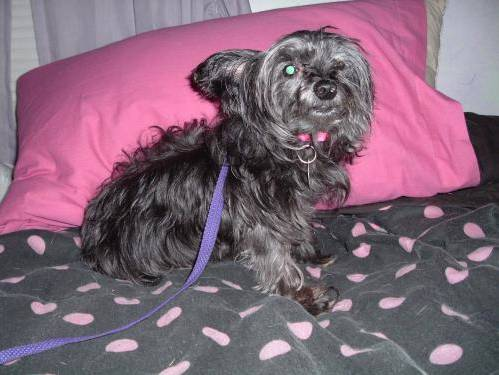

In [55]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename="/content/MeuDrive/MyDrive/Aula_LIA/Aula-09/Colab Notebooks/teste-a/dogs/dog.0.jpg")

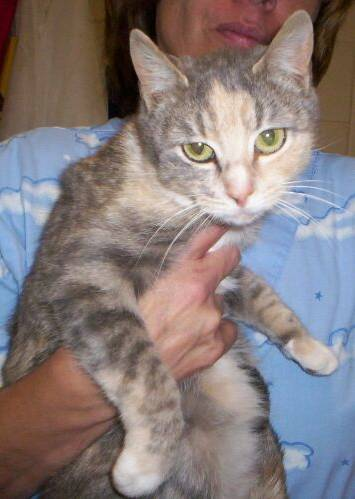

In [58]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/MeuDrive/MyDrive/Aula_LIA/Aula-09/Colab Notebooks/train/cat.10840.jpg')

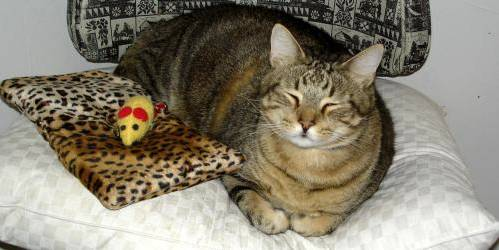

In [59]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/MeuDrive/MyDrive/Aula_LIA/Aula-09/Colab Notebooks/train/cat.10728.jpg')

In [60]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [78]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [79]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
import numpy as np
from keras.preprocessing import image

# Assuming 'classifier' is your Keras model
def preprocess_image(image_path):
    """Loads and preprocesses an image for prediction."""
    img = image.load_img(image_path, target_size=(256, 256,3))  # Load and resize image
    img = image.img_to_array(img)  # Convert to NumPy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Load and preprocess your test image
test_image = preprocess_image('/content/MeuDrive/MyDrive/Aula_LIA/Aula-09/Colab Notebooks/20250327_010205.jpg')

# Now you can make predictions:
result = classifier.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [82]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/MeuDrive/MyDrive/Aula_LIA/Aula-09/Colab Notebooks/teste-a',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 810 images belonging to 2 classes.


In [83]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 228ms/step - accuracy: 0.4910 - loss: 1.4014 
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


  9/625 ━━━━━━━━━━━━━━━━━━━━ 2:37:17 15s/step - accuracy: 0.5718 - loss: 0.6737

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colab_Notebooks_2025_1/Aula 09 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg')

Nao deu tempo de editar a matriz da confusao

In [ ]:
# Imprime a matriz de confusão
from sklearn.metrics import confusion_matrix

# Previsão do modelo
y_pred = modelo_lia.predict(imagens_teste)
y_pred_classes = np.argmax(y_pred, axis=1)

# Labels já estão no formato inteiro, então podemos usá-las diretamente
y_true = labels_teste.flatten()  # Caso labels_teste tenha shape (10000, 1)

# Geração da matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Impressão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nomes_classes,
            yticklabels=nomes_classes)
plt.title('Matriz de Confusão - CIFAR-10')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()